## Importing required packages

In [13]:
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
import collections
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re
import string

## Loading dataset

In [8]:
train_data = pd.read_csv('corpus_training.csv', usecols=['text',
                         'label1'])  # loading only required columns

## Initializing stopwords and lemmatizer

In [9]:
stopwords = nltk.corpus.stopwords.words('english')

# adding more words to the existing stopword list

stopwords += [
    'inch',
    'x',
    'furniture',
    'pattern',
    'please',
    'note',
    'features',
    'material',
    'dimensions',
    'style',
    'set',
    'includes',
    'area',
    'design',
    'replacement',
    'finish',
    ] # the new terms as stopword was determined using wordcloud

ps = nltk.PorterStemmer()
lm = nltk.WordNetLemmatizer()

## Utility function to clean the text

In [10]:
def clean_text(text):
    """ 
        description: removes punctuation, stopwords and applies lemmatization
        input: string
        output: string
    
    """

    text = text.split(':')[0]  # skipping contents past first ':' since they are of not much importance

    text = ''.join([word.lower() for word in text if word
                   not in string.punctuation])  # removing punctuation

    text = re.sub(" \d+", ' ', text)  # removing numbers
    tokens = re.split('\W+', text)  # splitting string into tokens
    text = [lm.lemmatize(word) for word in tokens if word
            not in stopwords]  # apply lemmatizer on each token

    return ' '.join(text)


In [5]:
label_list = train_data['label1'].unique()  # to fetch distinct labels from label1 column
label_list

array(['dining', 'bedroom', 'living', 'accessories', 'outdoor', 'office',
       'lighting', 'kids'], dtype=object)

## Wordcloud generator

----------------------------------------------------------------------------------------------------
Wordcloud for dining label


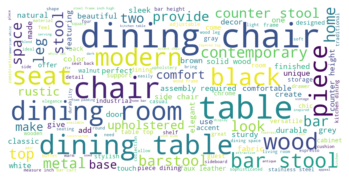

----------------------------------------------------------------------------------------------------
Wordcloud for bedroom label


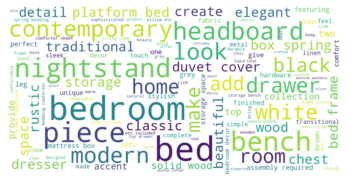

----------------------------------------------------------------------------------------------------
Wordcloud for living label


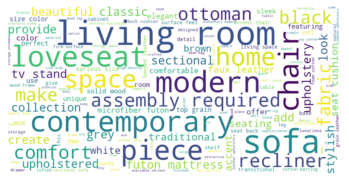

----------------------------------------------------------------------------------------------------
Wordcloud for accessories label


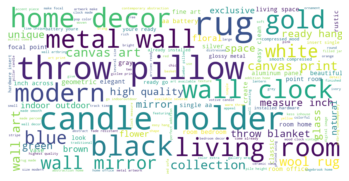

----------------------------------------------------------------------------------------------------
Wordcloud for outdoor label


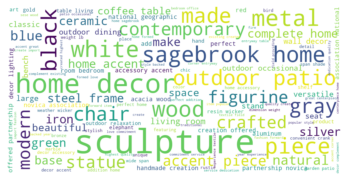

----------------------------------------------------------------------------------------------------
Wordcloud for office label


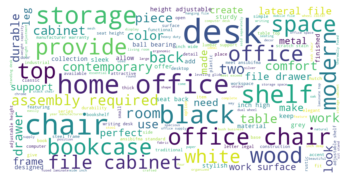

----------------------------------------------------------------------------------------------------
Wordcloud for lighting label


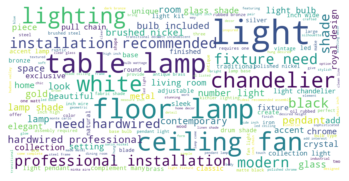

----------------------------------------------------------------------------------------------------
Wordcloud for kids label


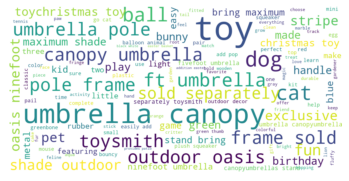

In [11]:
''' 
    Below for loop is used to print wordcloud of all the words present in text column for a particular label
    Iterates over label_list and generates wordcloud for each label.
'''  # used to accumulate top words for each label

top_word = {}

for label in label_list:
    print ('-' * 100)
    print ('Wordcloud for', label, 'label')

    text_data = train_data[train_data['label1'] == label].text  # retrieve dataset of a particular label
    text = ' '.join(text_data.apply(clean_text).tolist())  # invoking utility function to clean the text

    # intitializing wordcloud generator

    wordcloud = WordCloud(max_font_size=40, max_words=1000,
                          background_color='white', scale=3,
                          random_state=1).generate(text)
    plt.figure(1, figsize=(6, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    words = []
    words = text.split(' ')
    counter = collections.Counter(words)
    top_word[label] = [terms[0] for terms in counter.most_common(10)]  # number 10 represents top 10 words for each label


In [12]:
# prints label and top terms

for (label, terms) in top_word.items():
    print (label, ':', terms, '\n')

dining : ['dining', 'chair', 'table', 'wood', 'bar', 'stool', 'seat', 'room', 'back', 'home'] 

bedroom : ['bed', 'drawer', 'bedroom', 'wood', 'storage', 'bench', 'piece', 'headboard', 'home', 'nightstand'] 

living : ['room', 'chair', 'sofa', 'home', 'leather', 'comfort', 'seat', 'wood', 'living', 'foam'] 

accessories : ['rug', 'wall', 'home', 'pillow', 'candle', 'color', 'art', 'room', 'decor', 'canvas'] 

outdoor : ['outdoor', 'home', 'sculpture', 'wood', 'decor', 'table', 'piece', 'metal', 'patio', 'accent'] 

office : ['office', 'chair', 'desk', 'drawer', 'file', 'shelf', 'home', 'table', 'storage', 'seat'] 

lighting : ['light', 'lamp', 'shade', 'fan', 'lighting', 'pendant', 'glass', 'fixture', 'ceiling', 'bulb'] 

kids : ['toy', 'umbrella', 'canopy', 'outdoor', 'cat', 'toysmith', 'dog', 'shade', 'frame', 'ball'] 



## Using only top 10 terms for model building resulted in an accuracy of 82%. Accuracy kept on increasing as the number of top terms kept on increasing.